In [2]:
import random
import pandas as pd
from faker import Faker
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


## Functions

In [3]:
fake = Faker('es_MX')

In [4]:
def eval_name(name_: str) -> bool:

    if " " not in name_:
        return True

    name1, name2 = name_.split()[0], name_.split()[-1]

    if (name1[-1]=="o" and name2[-1] == "a") or (name1[-1]=="a" and name2[-1] == "o"):

        return True
    
    else:
        return False
    
def create_name(gender_: bool) ->str:
    
    names = [fake.first_name_female,fake.first_name_male]

    conditions = True
    while conditions:
        temp = []
        for i in range(random.randint(1,2)):
            temp.append(names[gender_]())

        name = " ".join(temp)
        if len(name.split()) >= 3:
            continue

        conditions = eval_name(name)

    return name

def bounded_normal_integer(mean_, var_, l_bound_ = None, u_bound_ = None) -> int:

    value = int(np.random.normal(mean_, var_))

    if l_bound_ is not None:
    
        value = max(value, l_bound_)

    if u_bound_ is not None:
    
        value = min(value, u_bound_)

    return value

def compute_centroid(points : list) -> float:

    A = 0
    Cx = 0
    Cy = 0

    points.append(points[0])
    for i in range(len(points)-1):

        x_i, y_i = points[i]
        x_ii, y_ii = points[i+1]
        
        print(x_i, y_i, "---->", x_ii, y_ii)

        A += ((x_i*y_ii)-(x_ii*y_i))
        Cx += (x_i+x_ii)*((x_i*y_ii)-(x_ii*y_i))
        Cy += (y_i+y_ii)*((x_i*y_ii)-(x_ii*y_i))
        
    A_tot = (1/2)*A
    Cx = (1/(6*A_tot))*Cx
    Cy = (1/(6*A_tot))*Cy

    return (Cx, Cy)


In [5]:
# Cols: ['name', 'last_name', 'gender', 'birth_date', 'phone_number', 'email', 'adress']

gender = random.choice([True, False])
birth_date = random.choice(pd.date_range("1950-01-01", "2019-01-01")).date()

{"name" : create_name(gender),
 "last_name" : " ".join([fake.last_name(), fake.last_name()] ),
 "gender" : gender, 
 "birth_date" : dt.datetime(random.choices([bounded_normal_integer(1990, 8, 1950), bounded_normal_integer(2005, 3, 1950)], weights= [0.5,0.5], k=1)[0],\
                            birth_date.month,\
                                birth_date.day)
 }


{'name': 'Andrés Eva',
 'last_name': 'Alonzo Moya',
 'gender': True,
 'birth_date': datetime.datetime(2000, 7, 6, 0, 0)}

In [6]:
gto_polig = {"Yerbabuena" : [(20.974300, -101.300626),
                             (20.946278, -101.298483),
                             (20.951706, -101.264939),
                             (20.979447, -101.274624),
                             (20.985938, -101.285636)],
                             "Marfil" : [(20.979212, -101.292779),
                                         (20.991242, -101.304647),
                                         (21.006043, -101.294156),
                                         (21.019272, -101.283363),
                                         (21.008196, -101.275124),
                                         (20.999863, -101.285270),
                                         (20.989350, -101.285501)],
                                         "Guanajuato" : [(21.001685, -101.236267),
                                                         (21.004701, -101.254310),
                                                         (21.008850, -101.274008),
                                                         (21.023665, -101.277944),
                                                         (21.034640, -101.259223),
                                                         (21.026755, -101.241643)]}

20.9743 -101.300626 ----> 20.946278 -101.298483
20.946278 -101.298483 ----> 20.951706 -101.264939
20.951706 -101.264939 ----> 20.979447 -101.274624
20.979447 -101.274624 ----> 20.985938 -101.285636
20.985938 -101.285636 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.9743 -101.300626 ----> 20.9743 -101.300626
20.979212 -101.292779 ----> 20.991242 -101.304647
20.991242 -101.304647 ----> 21.006043 -101.294156
21.006043 -101.294156 ----> 21.019272 -101.283363
21.019272 -101.283363 ----> 21.008196 -101.275124
21.008196 -101.275124 ----> 20.999863 -101.28527
20.999863 -101.28527 ----> 20.98935 -101.285501
20.98935 -101.285501 ----> 20.979212 -101.292779
20.979212 -101.292779 ----> 20.979212 -101.292779
20.979212 -101.292779 ----> 20.979212 -101.292779
20.979212 -101.292779 ----> 20.9

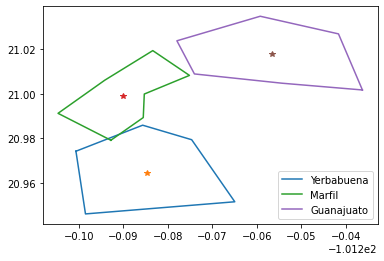

In [ ]:
for key in gto_polig.keys():
    lat =[]
    lon =[]
    for x,y in gto_polig[key]:
        lat.append(x)
        lon.append(y)

    x,y = compute_centroid(gto_polig[key])
    plt.plot(lon, lat, label = key)
    plt.plot(y, x, "*")
    plt.legend()
plt.show()
    